In [1]:
from data.data_cleaning import clean_sessions_jsonl

clean_sessions_jsonl('data_files/tracks.jsonl', 'data_files/sessions.jsonl', 'data_files/sessions_clean.jsonl')

/home/bilski/uni_repos/IUM/data/data_cleaning.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['user_id'] = df['user_id'].fillna(method='ffill')
/home/bilski/uni_repos/IUM/data/data_cleaning.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['user_id'] = df['user_id'].fillna(method='ffill')
/home/bilski/uni_repos/IUM/data/data_cleaning.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['user_id'] = df['user_id'].fillna(method='ffill')
/home/bilski/uni_repos/IUM/data/data_cleaning.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['user_id'] = df['user_id'].fillna(method='ffill')
/home/bilski/uni_repos/IUM/data/data_cle

In [2]:
import pandas as pd

sessions_df = pd.read_json('data_files/sessions_clean.jsonl', lines=True)

In [3]:
from data.data_transforming import SessionsEncoder, aggregate_interactions

sessions_encoder = SessionsEncoder()
sessions_transformed_df = sessions_encoder.fit_transform(sessions_df)

In [4]:
from data.data_split import split_data

train_data_df, val_data_df, test_data_df = split_data(sessions_transformed_df)
train_data_df.to_json('data_files/train_sessions_not_agg.jsonl', orient='records', lines=True)
val_data_df.to_json('data_files/val_sessions_not_agg.jsonl', orient='records', lines=True)
test_data_df.to_json('data_files/test_sessions_not_agg.jsonl', orient='records', lines=True)
train_data_df = aggregate_interactions(train_data_df)
val_data_df = aggregate_interactions(val_data_df)
test_data_df = aggregate_interactions(test_data_df)

In [5]:
train_data_df.to_json('data_files/train_sessions.jsonl', orient='records', lines=True)
val_data_df.to_json('data_files/val_sessions.jsonl', orient='records', lines=True)
test_data_df.to_json('data_files/test_sessions.jsonl', orient='records', lines=True)

In [12]:
print(min(train_data_df['score']))
print(min(val_data_df['score']))
print(min(test_data_df['score']))

1.0
0.0
0.0


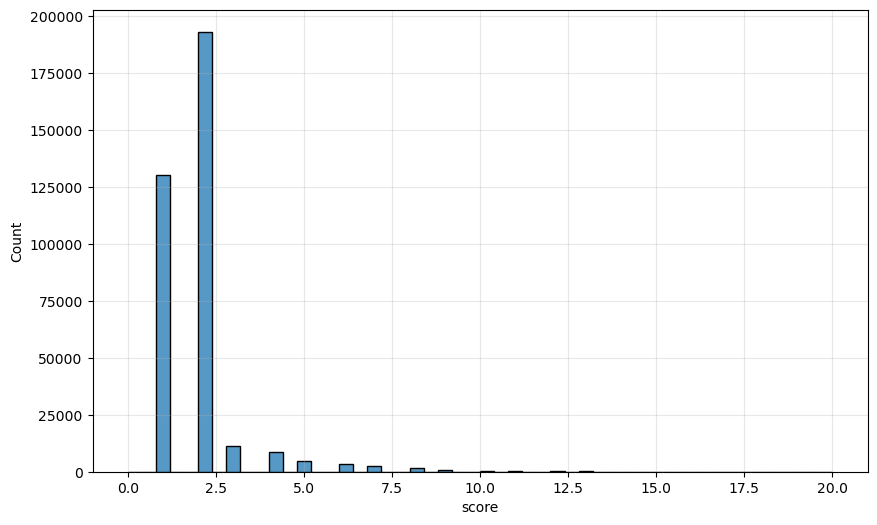

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=val_data_df, x='score', bins=50)
plt.grid(True, alpha=0.3)
plt.show()